<a href="https://colab.research.google.com/github/junny048/Flight_Delay_Prediction/blob/main/airline_delay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 명 : 항공편 지연 예측
- 목표 : 항공편 출발 지연 여부(15분 기준)를 사전에 예측

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("usdot/flight-delays")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'flight-delays' dataset.
Path to dataset files: /kaggle/input/flight-delays


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
data_path = '/root/.cache/kagglehub/datasets/usdot/flight-delays/versions/1'

In [7]:
files = os.listdir(data_path)
files

['airlines.csv', 'flights.csv', 'airports.csv']

In [8]:
flights_df = pd.read_csv('/root/.cache/kagglehub/datasets/usdot/flight-delays/versions/1/flights.csv')
airports_df = pd.read_csv('/root/.cache/kagglehub/datasets/usdot/flight-delays/versions/1/airports.csv')
airlines_df = pd.read_csv('/root/.cache/kagglehub/datasets/usdot/flight-delays/versions/1/airlines.csv')

/tmp/ipython-input-3465440309.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_df = pd.read_csv('/root/.cache/kagglehub/datasets/usdot/flight-delays/versions/1/flights.csv')


In [9]:
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
flights_df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [12]:
flights_df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [13]:
airports_df

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [14]:
airports_df.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [15]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [16]:
airports_df.describe()

,LATITUDE,LONGITUDE
count,319.000000,319.000000
mean,38.981244,-98.378964
std,8.616736,21.523492
min,13.483450,-176.646030
25%,33.652040,-110.839385
50%,39.297610,-93.403070
75%,43.154675,-82.722995
max,71.285450,-64.798560


In [17]:
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [18]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


# 데이터 정리
## 활용할 데이터 : flights_df만
- 기본적인 출발 / 도착 예측 모델은 flights_df로만 해도 충분히 가능해 보임

### 컬럼별 설명
- YEAR : 연도
- MONTH : 월
- DAY : 일
- DAY_OF_WEEK : 요일(1=월, 7=일)
- AIRLINE : 항공사 코드
- FLIGHT_NUMBER : 항공편 번호
- TAIL_NUMBER : 항공기 등록번호
- ORIGIN_AIRPORT : 출발 공항 코드
- DESTINATION_AIRPORT : 도착 공항 코드
- SCHEDULED_DEPARTURE : 예정 출발 시간
- DEPARTURE_TIME : 실제 출발 시간
- DEPARTURE_DELAY : 출발 지연 (분)
- TAXI_OUT : 지상 이동 시간
- WHEELS_OFF : 이륙 시간
- SCHEDULED_TIME : 예정 비행 시간 (분)
- ELAPSED_TIME : 실제 비행 시간 (분)
- AIR_TIME : 공중 비행 시간 (분)
- DISTANCE : 비행 거리 (마일)
- WHEELS_ON : 착륙 시간
- TAXI_IN : 착륙 후 지상 이동 시간
- SCHEDULED_ARRIVAL : 예정 도착 시간 (HHMM)
- ARRIVAL_TIME : 실제 도착 시간 (HHMM)
- ARRIVAL_DELAY : 도착 지연 (분)
- DIVERTED : 우회 여부
- CANCELLATION_REASON : 결항 사유
- AIR_SYSTEM_DELAY : 항공사 시스템 지연 (분)
- SECURITY_DELAY : 보안 지연 (분)
- AIRLINE_DELAY : 이전 항공편 지연 영향
- WEATHER_DELAY : 날씨 지연 (분)

In [19]:
flights_df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
flights_df.isna().mean()

,0
YEAR,0.000000
MONTH,0.000000
DAY,0.000000
DAY_OF_WEEK,0.000000
AIRLINE,0.000000
FLIGHT_NUMBER,0.000000
TAIL_NUMBER,0.002530
ORIGIN_AIRPORT,0.000000
DESTINATION_AIRPORT,0.000000
SCHEDULED_DEPARTURE,0.000000


In [21]:
flights_df['DEPARTURE_DELAY']

,DEPARTURE_DELAY
0,-11.0
1,-8.0
2,-2.0
3,-5.0
4,-1.0
...,...
5819074,-4.0
5819075,-4.0
5819076,-9.0
5819077,-6.0


In [22]:
positive_delay = flights_df[flights_df['DEPARTURE_DELAY'] > 0]['DEPARTURE_DELAY']
print(positive_delay)

7           14.0
9            3.0
20          25.0
27          12.0
29          21.0
           ...  
5819069    159.0
5819071     16.0
5819072      7.0
5819073     16.0
5819078     15.0
Name: DEPARTURE_DELAY, Length: 2125618, dtype: float64


# 1. 사용할 컬럼
- YEAR : 연도 -> 기본 날짜 정보, 결측치 없음
- MONTH : 월 -> 시즌/월별 지연 패턴 반영 가능
- DAY : 일 -> 월별/요일별 패턴 반영 가능
- DAY_OF_WEEK	: 요일 (1=월, 7=일)	-> 주중/주말 지연 패턴 반영 가능
- AIRLINE	: 항공사 코드 -> 항공사별 지연 차이 반영 가능
- ORIGIN_AIRPORT : 출발 공항 코드 -> 공항별 지연 패턴 반영 가능
- DESTINATION_AIRPORT	: 도착 공항 코드 -> 목적지 공항별 패턴 반영 가능
- SCHEDULED_DEPARTURE	: 예정 출발 시각 (HHMM → 분 단위) -> 출발 시간대별 지연 패턴 반영 가능
- DISTANCE : 비행 거리 -> 비행 시간에 따른 지연 영향 반영

## 이유
- 모두 예측 시점에 이미 알고 있는 정보임
- 실제 사건 이후 값(DEPARTUR_TIME, TAXI_OUT 등) 포함 X -> 현실적인 예측 가능

# 2. 타깃 컬럼
- DEPARTURE_DELAY : WHEELS_OFF - SCHEDULED_DEPARTURE
- 15분 이상이면 -> 1, 미만 -> 0

# 3. 식별 및 참조용 컬럼

---


- FLIGHT_NUMBER : 항공편 번호 -> 예측 결과를 항공편과 연결하기 위해 필요
- (선택적으로) DATE : YEAR, MONTH, DAY 합쳐서 -> 결과 확인용

## 이유
- 학습에는 사용하지 않지만 추후 예측 결과 확인용

# 4. 제거 및 불필요 컬럼
- TAIL_NUMBER : 실제 비행기 등록번호, 학습에는 불필요
- DEPARTURE_TIME : 실제 출발 시각, 예측 시점에는 알 수 없음
- TAXI_OUT, WHEELS_OFF, ELAPSED_TIME, AIR_TIME, WHEELS_ON, TAXI_IN : 사건 이후 값, 학습 시점에서는 알 수 없음
- SCHEDULED_TIME, SCHEDULED_ARRIVAL, ARRIVAL_TIME, ARRIVAL_DELAY : 실제 또는 예정 도착 정보, 출발 지연 예측에는 필요 없음
- DIVERTED, CANCELLED, CANCELLATION_REASON : 결측 많거나 예측 시점에 정보 없음
- AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, WEATHER_DELAY : 결측치 80% 이상, 그대로 쓰면 의미 없음

## 이유
- 대부분 결측치 많거나 사건 이후에 알 수 있는 값 -> 학습용 feature로 사용 X



In [23]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
feature_cols = ['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
                'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DISTANCE']
identifier_col = ['FLIGHT_NUMBER']
target_col = 'DEPARTURE_DELAY'

In [25]:
df = flights_df[feature_cols + identifier_col + [target_col]].copy()

In [26]:
df['DELAYED'] = (df['DEPARTURE_DELAY'] > 15).astype(int)

In [27]:
df = df.dropna(subset=[target_col])

In [28]:
scaler = StandardScaler()
df[['SCHEDULED_DEPARTURE', 'DISTANCE']] = scaler.fit_transform(df[['SCHEDULED_DEPARTURE', 'DISTANCE']])

In [29]:
df['AIRLINE'] = df['AIRLINE'].astype(str)
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype(str)
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype(str)

In [30]:
le_airline = LabelEncoder()
le_airport = LabelEncoder()

In [31]:
df['AIRLINE'] = le_airline.fit_transform(df['AIRLINE'])
df['ORIGIN_AIRPORT'] = le_airport.fit_transform(df['ORIGIN_AIRPORT'])
df['DESTINATION_AIRPORT'] = le_airport.fit_transform(df['DESTINATION_AIRPORT'])

In [32]:
print("전처리 후 DataFrame 정보:")
print(df.info())
print("\n타깃 값 분포:")
print(df['DELAYED'].value_counts())
print("\n샘플 데이터:")
print(df.head())

전처리 후 DataFrame 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 5732926 entries, 0 to 5819078
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              int64  
 5   ORIGIN_AIRPORT       int64  
 6   DESTINATION_AIRPORT  int64  
 7   SCHEDULED_DEPARTURE  float64
 8   DISTANCE             float64
 9   FLIGHT_NUMBER        int64  
 10  DEPARTURE_DELAY      float64
 11  DELAYED              int64  
dtypes: float64(3), int64(9)
memory usage: 568.6 MB
None

타깃 값 분포:
DELAYED
0    4714368
1    1018558
Name: count, dtype: int64

샘플 데이터:
   YEAR  MONTH  DAY  DAY_OF_WEEK  AIRLINE  ORIGIN_AIRPORT  \
0  2015      1    1            4        1             323   
1  2015      1    1            4        0             482   
2  2015      1    1            4       11             584   
3  2015      1  

# DataFrame 구조
- 결측치 제거로 약 80,000개 정도 줄어듦
- 범주형 컬럼(AIRLINE, ORIGIN_AIRPORT, DESTINATION_AIRPORT)은 int로 Label Encoding 완료
- 수치형 컬럼(SCHEDULED_DEPARTURE, DISTANCE, DEPARTURE_DELAY)은 float
- 나머지 날짜/식별 컬럼은 int

# 타깃 값 분포
- 0 (지연 < 15분) : 4,714,368개
- 1 (지연 >= 15분) : 1,018,558개

- 약 18% 정도만 지연 -> 클래스 불균형 존재
- 나중에 모델 학습 시 클래스 가중치, 샘플링, f1 등 고려 필요함

# 샘플 데이터
- SCHEDULED_DEPARTURE, DISTANCE는 표준화(StandardScaler) 적용됨 → 평균 0, 표준편차 1 주변 값

- 범주형 컬럼은 모두 정수형 Label Encoding 완료

- 타깃 DELAYED는 0/1로 잘 생성됨

In [33]:
from sklearn.model_selection import train_test_split

# 학습용 feature
feature_cols = [
    'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
    'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
    'SCHEDULED_DEPARTURE', 'DISTANCE'
]

# 타깃
target_col = 'DELAYED'

X = df[feature_cols]
y = df[target_col]

In [34]:
# 클래스별 샘플 수 확인
print("클래스 분포:\n", y.value_counts())

# 최소 샘플 수가 충분히 많은지 확인 후 stratify 적용
min_class_count = y.value_counts().min()
print("최소 클래스 샘플 수:", min_class_count)

클래스 분포:
 DELAYED
0    4714368
1    1018558
Name: count, dtype: int64
최소 클래스 샘플 수: 1018558


In [35]:
if min_class_count >= 2:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

print("학습 데이터:", X_train.shape, y_train.shape)
print("테스트 데이터:", X_test.shape, y_test.shape)

학습 데이터: (4586340, 9) (4586340,)
테스트 데이터: (1146586, 9) (1146586,)


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [37]:
# 1. 모델 생성
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# 2. 학습
lr_model.fit(X_train, y_train)

# 3. 예측
y_pred = lr_model.predict(X_test)

In [38]:
# 4. 평가
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [39]:
print("=== Logistic Regression Performance ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print("Confusion Matrix:")
print(cm)

=== Logistic Regression Performance ===
Accuracy : 0.8223
Precision: 0.0000
Recall   : 0.0000
F1-score : 0.0000
Confusion Matrix:
[[942874      0]
 [203712      0]]


In [40]:
# 1. 모델 생성 (불균형 클래스 보정)
lr_model_balanced = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # 소수 클래스 가중치 자동 조정
)

In [41]:
# 2. 학습
lr_model_balanced.fit(X_train, y_train)

# 3. 예측
y_pred_balanced = lr_model_balanced.predict(X_test)

In [42]:
acc = accuracy_score(y_test, y_pred_balanced)
prec = precision_score(y_test, y_pred_balanced)
rec = recall_score(y_test, y_pred_balanced)
f1 = f1_score(y_test, y_pred_balanced)
cm = confusion_matrix(y_test, y_pred_balanced)

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

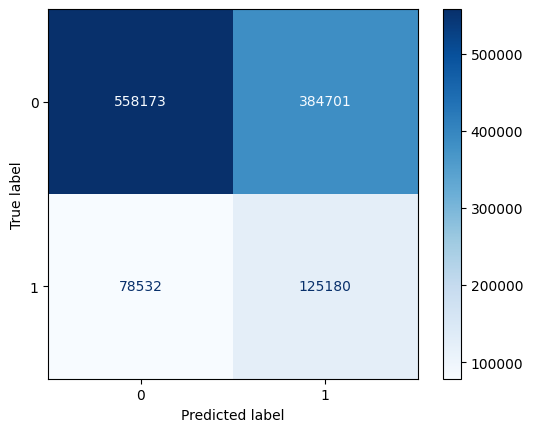

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [45]:
print("=== Logistic Regression (Balanced) Performance ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

=== Logistic Regression (Balanced) Performance ===
Accuracy : 0.5960
Precision: 0.2455
Recall   : 0.6145
F1-score : 0.3508


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [47]:
# 1. 모델 정의 (클래스 불균형 보정)
rf_model = RandomForestClassifier(
    n_estimators=40,        # 트리 개수 줄이기
    max_depth=12,           # 깊이 제한
    random_state=42,
    class_weight='balanced',
    n_jobs=2                # CPU 병렬 2개만 사용
)

In [48]:
# 2. 모델 학습
rf_model.fit(X_train, y_train)

# 3. 예측
y_pred = rf_model.predict(X_test)

In [49]:
# 4. 성능 평가
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

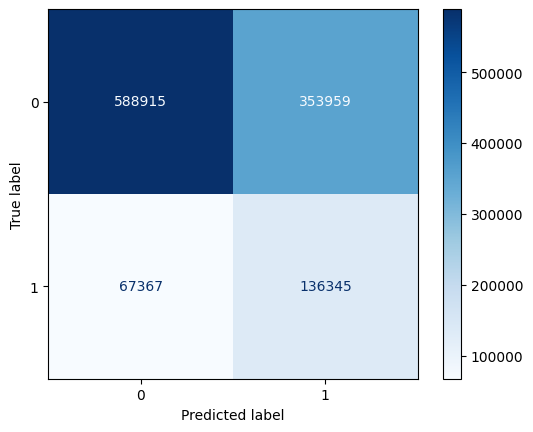

In [50]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [52]:
print("=== Random Forest Performance ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"Confusion Matrix:")
print(cm)

=== Random Forest Performance ===
Accuracy : 0.6325
Precision: 0.2781
Recall   : 0.6693
F1-score : 0.3929
Confusion Matrix:
[[588915 353959]
 [ 67367 136345]]


In [54]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [55]:
# XGBoost 모델 정의
xgb_model = XGBClassifier(
    n_estimators=200,        # 트리 개수
    max_depth=6,            # 트리 깊이
    learning_rate=0.1,      # 학습률
    subsample=0.8,          # 샘플링 비율
    colsample_bytree=0.8,   # 트리별 피처 샘플링
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # 클래스 불균형 보정
    random_state=42,
    n_jobs=-1,
    tree_method='hist'       # Colab에서 빠르게
)

In [56]:
# 모델 학습
xgb_model.fit(X_train, y_train)

# 예측
y_pred_xgb = xgb_model.predict(X_test)

In [57]:
# 성능 평가
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
cm = confusion_matrix(y_test, y_pred_xgb)

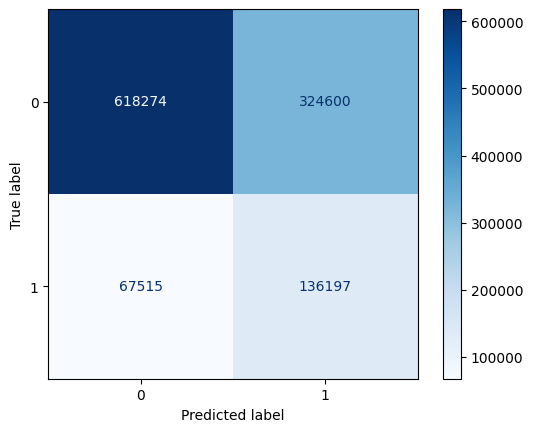

In [58]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [59]:
print("=== XGBoost Performance ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"Confusion Matrix:")
print(cm)

=== XGBoost Performance ===
Accuracy : 0.6580
Precision: 0.2956
Recall   : 0.6686
F1-score : 0.4099
Confusion Matrix:
[[618274 324600]
 [ 67515 136197]]


# 결과 분석

| 모델                                 |  Accuracy  |  Precision |   Recall   |  F1-score  | 주요 특징                                    |
| :--------------------------------- | :--------: | :--------: | :--------: | :--------: | :--------------------------------------- |
| **Logistic Regression (Balanced)** |   0.5932   |   0.2436   |   0.6126   |   0.3486   | 선형 모델로 기본 성능 파악용. 간단하지만 한계 있음            |
| **Random Forest**                  |   0.6325   |   0.2781   |   0.6693   |   0.3929   | 비선형 관계 일부 포착, Recall 높음. 다소 Precision 낮음 |
| **XGBoost**                        | **0.6580** | **0.2956** | **0.6686** | **0.4099** | 가장 균형 잡힌 성능. Precision·F1 모두 향상          |


# 회고
- 클래스 불균형으로 precision이 낮은 거 같음
- feature을 강화해야할거 같음
- 생각보다 성능이 많이 아쉬움..
- 머신러닝 프로젝트는 거의 처음이라 어려웠다. -> 딥러닝 하고 싶다(비전 최고)